**Importing Necessary Libraries and Github Repo**

In [75]:
# Uncomment the below code if the notebook is run on Google Colab.
!git clone https://github.com/abirmondal/detect-abusive-comment.git

fatal: destination path 'detect-abusive-comment' already exists and is not an empty directory.


In [78]:
utils_folder_path = '/content/detect-abusive-comment/src/utils'

import os
from sklearn.feature_extraction.text import TfidfVectorizer
os.chdir(utils_folder_path)
import model_report as mr
import dataset as ds
import pickle as pkl

**Loading Dataset**

In [79]:
df_train, df_test = ds.get_full_dataset(val=False)
X_train, X_test = df_train['text'].to_list(), df_test['text'].to_list()
Y_train, Y_test = df_train['hate'].values, df_test['hate'].values

ds.get_dataset_details()
print('\nTesting Set Dataset Structure :-')
ds.get_test_set()

Dataset Details:-
  Dataset Name: m_dataset_21_9
   Total Count: 90345
     Train Set: 63241 ( 70.0% )
      Test Set: 18069 ( 20.0% )
Validation Set:  9035 ( 10.0% )

Testing Set Dataset Structure :-


,text,hate
0,বাঙালি জীবনেও আগাইতে পারবে না এই ধরনের শো বাইর...,0
1,বাহ চমেৎকার সিলেট খুলনাকে হারাই দিলো,0
2,এই সালা কে গুলি করে মারা উচিত,1
3,ধুর তোর খেলার মাইরে বাপ আর খেলাই দেখবো না,0
4,ভচ মিথ্যা বলেন কেনো আপনি তো গাঁজা খাইছেন,1
...,...,...
18064,আল্লাহ এই যুগের মেয়েরা কি এখনো এত বোকা আছে না...,0
18065,অপেক্ষায় আছে বাংলাদেশের কোটি মানুষ কবে শুনতে ...,0
18066,হুই হাই হুই হাই করার সময় ভাবি এত্তগুলি বান্দর...,0
18067,সব মাদার চুদরা দারিয়ে দেকলো,1


**TF-IDF Vectorization**

In [80]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Loading Pre-Trained Model**

---



1.   Support Vector Machine
2.   Logistic Regression
3.   Naive Bayes



In [83]:
model_path = '/content/detect-abusive-comment/src/models/toxic-comments-lr.pkl'
loaded_model = pkl.load(open(model_path, 'rb'))

    Accuracy Score:  0.7237257180806906
Weighted Precision:  0.7220282626766418
   Weighted Recall:  0.5667493148897299
          F1-Score:  0.6350343617487937

Classification Report :-
               precision    recall  f1-score   support

           0       0.72      0.84      0.78     10406
           1       0.72      0.57      0.64      7663

    accuracy                           0.72     18069
   macro avg       0.72      0.70      0.71     18069
weighted avg       0.72      0.72      0.72     18069



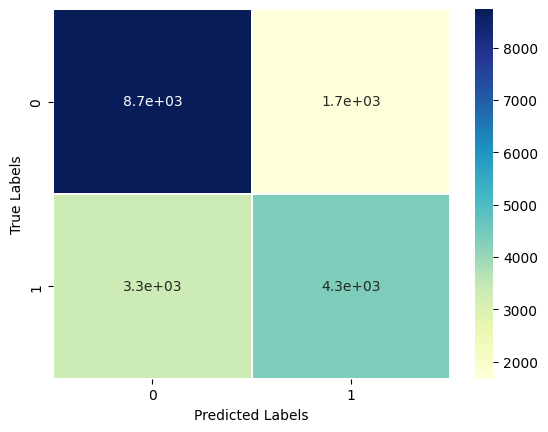

In [84]:
y_pred = loaded_model.predict(X_test_tfidf)
mr.confusion_mat(Y_test, y_pred)
mr.model_eval(Y_test, y_pred)